<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/Statistic/Workshop3_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workshop 3. Fermín Méndez García A01703366

In [11]:
def ccr(df):
  x = np.log(df) - np.log(df.shift(1))
  x = x.dropna()
  return x

2
Hypothesis testing - comparing the mean of 2 groups

En este trabajo tomaremos la diferencia de las medias como variable de estudio.
Queremos comprobar que las medias son distintas.
Para eso planetamos las hipótesis


*   ho-> diff=0

*   ha-> diff!=0



In [12]:
import yfinance as yf
import numpy as np
import pandas as pd

sprices=yf.download(tickers=["INTC","AMD"], start="2019-01-01",interval="1mo")
df_INTC=yf.download(tickers="INTC", start="2019-01-01",interval="1mo")
df_AMD=yf.download(tickers=["AMD"], start="2019-01-01",interval="1mo")


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [13]:
ccr_INT=ccr(df_INTC['Adj Close'])
ccr_INT.head()
ccr_AMD=ccr(df_AMD['Adj Close'])
ccr_AMD.head()


Date
2019-02-01   -0.036717
2019-03-01    0.081186
2019-04-01    0.079440
2019-05-01   -0.007994
2019-06-01    0.102547
Name: Adj Close, dtype: float64

In [14]:
# Stating the hypotheses:
# H0: (mean(rAMD) - mean(rINTEL)) = 0
# Ha: (mean(rAMD) - mean(rINTEL)) <> 0

# Calculating the standard error of the difference of the means:

N = ccr_AMD.count()
amdvar = ccr_AMD.var()
intelvar = ccr_INT.var()
sediff = np.sqrt((1/N) * (amdvar + intelvar ) )

# Calculating the t-Statistic:
t = (ccr_AMD.mean() - ccr_INT.mean()) / sediff
t

1.3243930232109231

Con esto interpretamos que hay solo un poco más del 70% de probabilidad que la la diferencia de los retornos de ambas empresas sean diferentes. En este caso no hay muestra probabilistica significativa que garantice que una es mejor que la otra con diferencia.

In [15]:
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (amdvar + intelvar)**2  / ( (amdvar/N)**2 + (intelvar/N)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.1885972373123008

In [16]:
st.ttest_ind(ccr_AMD,ccr_INT,equal_var=False)


Ttest_indResult(statistic=1.324393023210923, pvalue=0.1885972373123009)

Hemos comprobado que los calculos son correctos

3- Niveles de confianza:
Como regla general se aceptan la hipótesis con una confianza de 95% o más. Pero ese 5% restante sigue siendo una pribailidad que falle.
A ese valor restante se le llama PValue. Y si una prueba falla debido a ese porcentaje es conocido como error de tipo I


In [17]:
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(ccr_AMD,ccr_INT,equal_variances=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(    Variable      N      Mean        SD        SE  95% Conf.  Interval
 0  Adj Close   55.0  0.026997  0.145610  0.019634  -0.012367  0.066361
 1  Adj Close   55.0 -0.004170  0.096212  0.012973  -0.030180  0.021839
 2   combined  110.0  0.011413  0.123834  0.011807  -0.011988  0.034815,
                     Satterthwaite t-test  results
 0  Difference (Adj Close - Adj Close) =    0.0312
 1                  Degrees of freedom =   93.6031
 2                                   t =    1.3244
 3               Two side test p value =    0.1886
 4              Difference < 0 p value =    0.9057
 5              Difference > 0 p value =    0.0943
 6                           Cohen's d =    0.2526
 7                           Hedge's g =    0.2508
 8                      Glass's delta1 =    0.2140
 9                    Point-Biserial r =    0.1356)

En este caso el adj close que aparece primero es AMD e INTEL es el segundo.

4- Medidas de relación
TEniendo más de una variable es posible que se relacionen entre sí por pares. Por ejemplo si tenemos una variable de velocidad, otra de distancia y una de tiempo. Donde la distancia es t*v entonces la distancia es directamente proporcional al tiempo y a la velocidad.


A continuación veremos un ejemplo con Microsoft y s&500

In [18]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%%**********************]  2 of 2 completed


<Figure size 640x480 with 0 Axes>

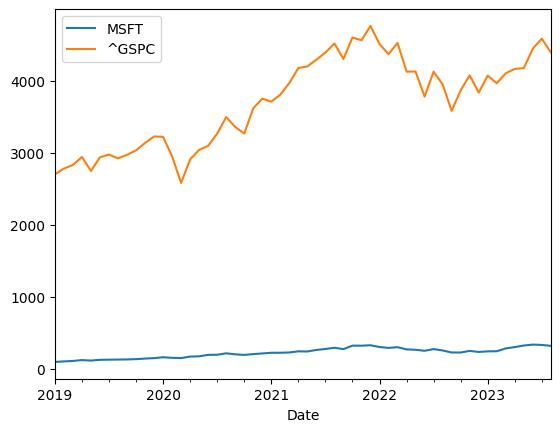

In [19]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [20]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 640x480 with 0 Axes>

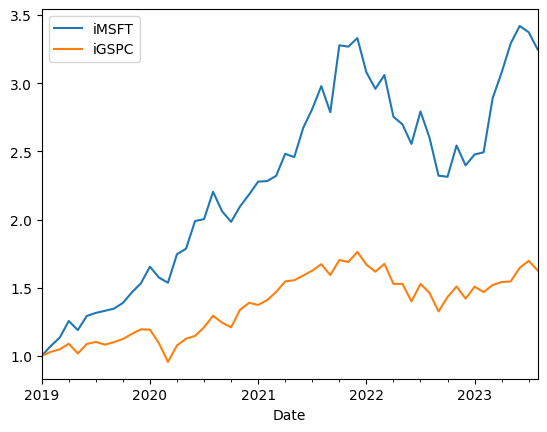

In [21]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [22]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

In [23]:
r.head()


,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083538,0.066658


<Figure size 640x480 with 0 Axes>

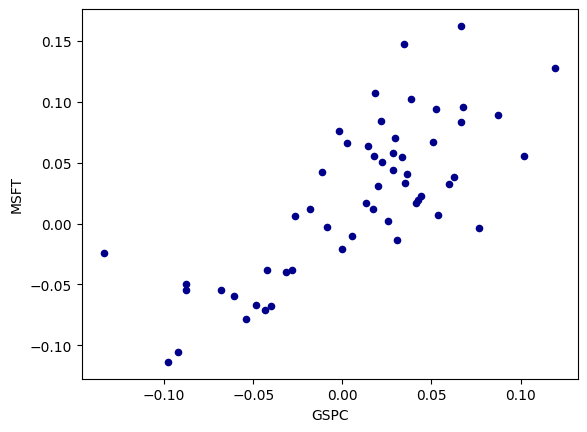

In [24]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 640x480 with 0 Axes>

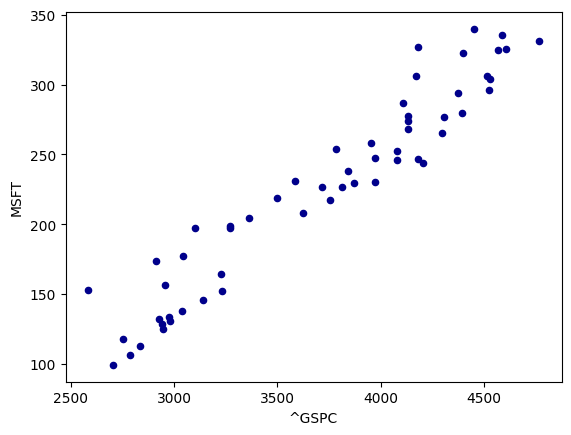

In [25]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 640x480 with 0 Axes>

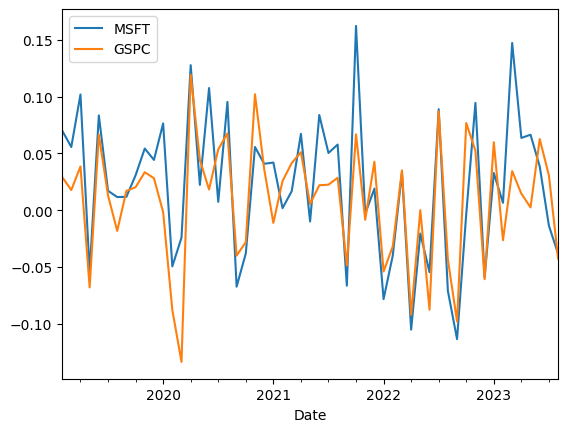

In [26]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

4-Medidas de relaciones lineales:
Covarianza y correlación

Son datos que nos ayudan a determinar la dependencia entre dos variables.


Una variable estacionaria es aquella que mantiene una media y desviación estándar a lo largo del tiempo.
Hay que identificar si nuestras variables son estacionarias o no estacionarias. Es común que en las no estacionarias encontremos una falsa correlación lineal. Es mejora analizarlas con series de tiempo.

La covarancia se define como la desviación de los valores respecto a sus medias. En esta caso COV(X,Y) es el producti de todas las diferencias (X-xi) y (Y-yi) entre n


¿Por qué se usa N-1 y no N para la covarianza de muestras?

Una covarianza negativa indica una realación lineal negativa y aplica lo mismo para la positiva. La varianza tiene valores que van a lo largo de todos los números reales y es dificil de interpretar. Por otra parte el indicie de correlación es un valor acotado entre -1 y 1 que representa de mejora manera si dos variables son lienealmente dependientes.

La desviación estándar la correlación. Es SD(corr)=(1-r^2/(n-2))^(1/2))

Y la t-statistic va a ser corr/SD(corr)

4.3 Calculando la varianza  y la correlación

In [27]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()
cov = sum_of_prod / (N-1)
cov

0.0025821906211170825

In [28]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00395674, 0.00258219],
       [0.00258219, 0.00287317]])

In [29]:
cov = covm[0,1]
cov


0.002582190621117082

In [30]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.76584037],
       [0.76584037, 1.        ]])

In [31]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7658403742833287

In [32]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2


PearsonRResult(statistic=0.7658403742833285, pvalue=9.649211978362864e-12)